In [240]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
def net_select(lnum):
    if lnum==2:
        return './net_2/'
    elif lnum==3:
        return './net_3/'
    elif lnum==4:
        return './net_4/'
    elif lnum==5:
        return './net_5/'
    elif lnum==6:
        return './net_6/'

In [242]:
def file_select(num, TorV, LorA):
    st = ''
    if num==0:
        st=st+'0_'
    elif num==1:
        st=st+'1_'
    elif num==2:
        st=st+'2_'
    if TorV=='T':
        st=st+'test_'
    elif TorV=='V':
        st=st+'valid_'
    if LorA=='L':
        st=st+'loss'
    elif LorA=='A':
        st=st+'acc'
    st=st+'_log.csv'
    return st
    

In [243]:
def make_flist(lnum, TorV, LorA):
    lis = []
    for i in range(3):
        lis.append(net_select(lnum)+file_select(i, TorV, LorA))
    return lis

In [244]:
def plot_graph(path_list_T, path_list_V, fname, LorA, title, save=False):
    df0 = pd.read_csv(path_list_T[0])
    df1 = pd.read_csv(path_list_T[1])
    df2 = pd.read_csv(path_list_T[2])
    df = pd.concat([df0, df1, df2], axis=0).drop('Unnamed: 0', axis=1)
    df_mean = pd.DataFrame(df.mean()).T
    df = pd.concat([df, df_mean]).set_axis(['1','2','3','mean']).T
    li1 = df['1'].to_list()
    li2 = df['2'].to_list()
    li3 = df['3'].to_list()
    lim = df['mean'].to_list()
    
    df00 = pd.read_csv(path_list_V[0])
    df11 = pd.read_csv(path_list_V[1])
    df22 = pd.read_csv(path_list_V[2])
    dff = pd.concat([df00, df11, df22], axis=0).drop('Unnamed: 0', axis=1)
    dff_mean = pd.DataFrame(dff.mean()).T
    dff = pd.concat([dff, dff_mean]).set_axis(['1','2','3','mean']).T
    li11 = dff['1'].to_list()
    li22 = dff['2'].to_list()
    li33 = dff['3'].to_list()
    limm = dff['mean'].to_list()

    plt.plot(range(len(li1)), li1, color='#008000', alpha=0.3, label='train:1')
    plt.plot(range(len(li2)), li2, color='#1E90FF', alpha=0.3, label='train:2')
    plt.plot(range(len(li3)), li3, color='#6A4C9C', alpha=0.3, label='train:3')
    plt.plot(range(len(lim)), lim, color='#0000CD', label='train:mean')
    plt.plot(range(len(li11)), li11, color='#FFB6C1', alpha=0.5, label='valid:1')
    plt.plot(range(len(li22)), li22, color='#FFA500', alpha=0.3, label='valid:2')
    plt.plot(range(len(li33)), li33, color='#CD5C5C', alpha=0.3, label='valid:3')
    plt.plot(range(len(limm)), limm, color='#FF0000', label='valid:mean')
    if LorA=='L':
        plt.ylabel('loss')
    elif LorA=='A':
        plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title(title)
    plt.legend()
    if save:
        plt.savefig(fname+'.png')
    plt.show()

In [245]:
T = 'T'
V = 'V'
L = 'L'
A = 'A'

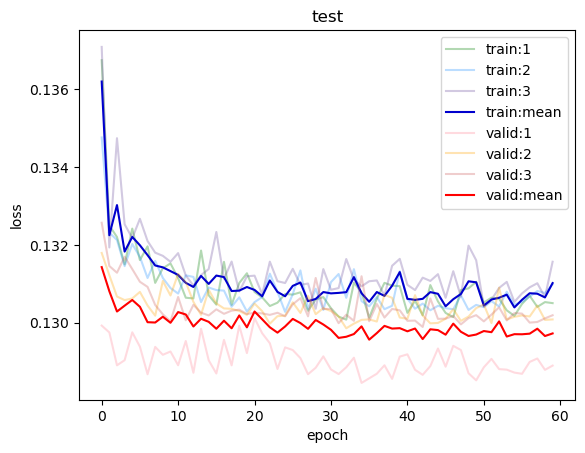

In [246]:
# for test
lis_l2_test_loss = make_flist(2, T, L)
lis_l2_valid_loss = make_flist(2, V, L)
plot_graph(lis_l2_test_loss, lis_l2_valid_loss, '', L, 'test')

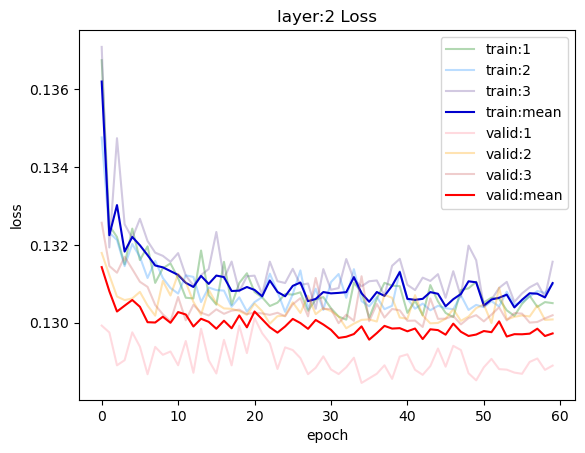

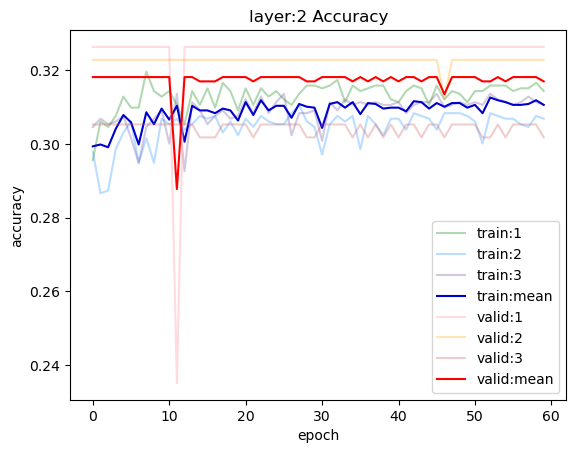

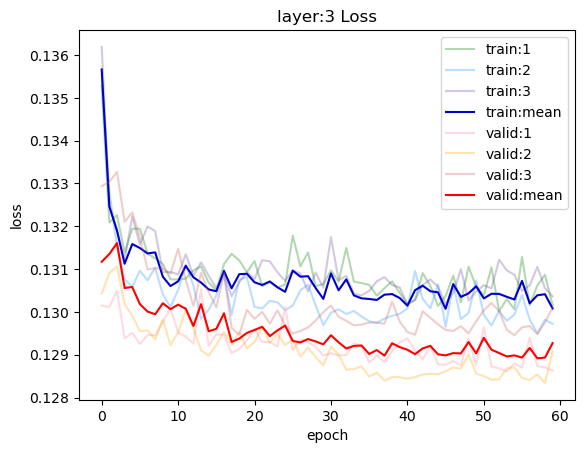

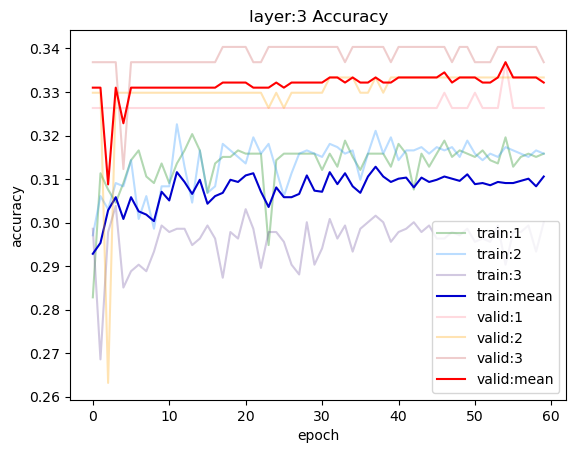

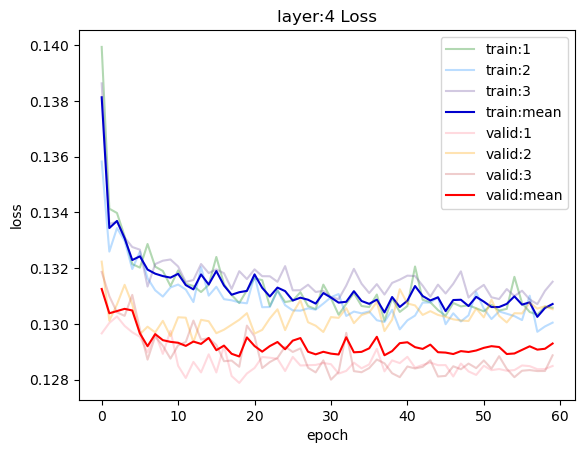

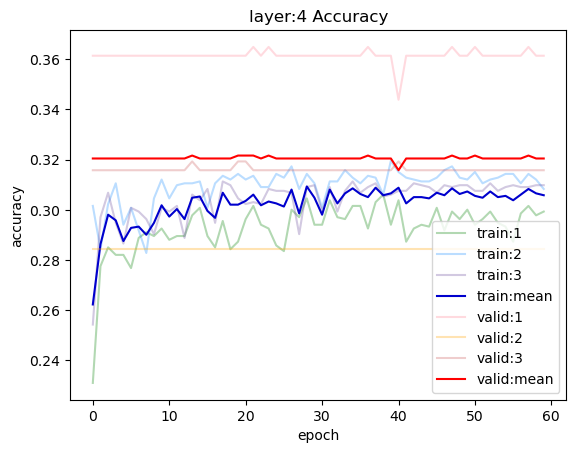

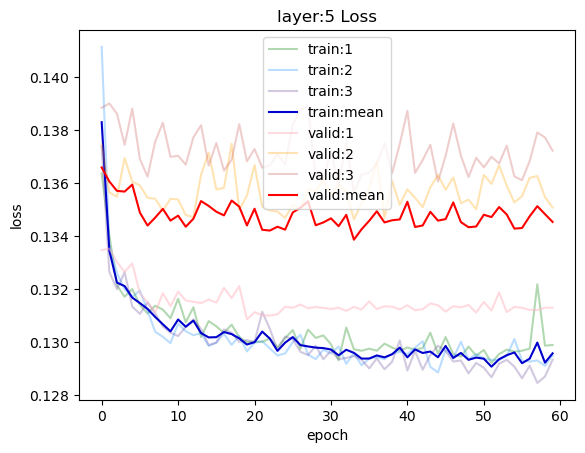

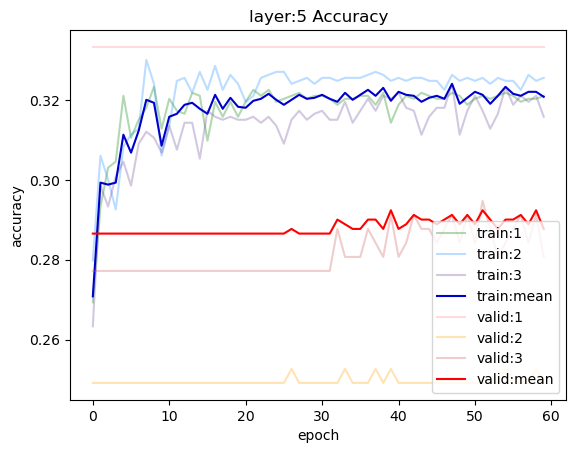

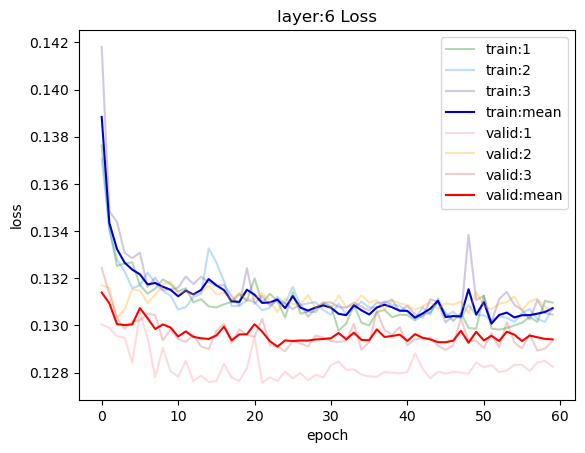

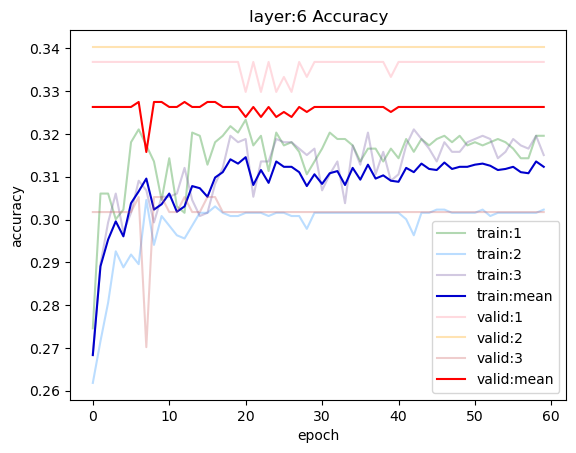

In [247]:
for i in range(2, 7):
    l_num = str(i)
    list_li_test_loss = make_flist(i, T, L)
    list_li_valid_loss = make_flist(i, V, L)
    plot_graph(list_li_test_loss, list_li_valid_loss, 'layer_'+l_num+'_loss', L, 'layer:'+l_num+' Loss', True)
    list_li_test_acc = make_flist(i, T, A)
    list_li_valid_acc = make_flist(i, V, A)
    plot_graph(list_li_test_acc, list_li_valid_acc, 'layer_'+l_num+'_acc', A, 'layer:'+l_num+' Accuracy', True)